In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

c:\Users\reetu\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data=pd.read_csv('C:\\Users\\reetu\\Downloads\\Diabetes-Deployment-With-BeanStalk-main (1)\\Diabetes-Deployment-With-BeanStalk-main\\Dataset\\diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data['Glucose']=np.where(data['Glucose']==0,data['Glucose'].median(),data['Glucose'])
data['BloodPressure']=np.where(data['BloodPressure']==0,data['BloodPressure'].median(),data['BloodPressure'])
data['SkinThickness']=np.where(data['SkinThickness']==0,data['SkinThickness'].median(),data['SkinThickness'])
data['Insulin']=np.where(data['Insulin']==0,data['Insulin'].median(),data['Insulin'])
data['BMI']=np.where(data['BMI']==0,data['BMI'].median(),data['BMI'])

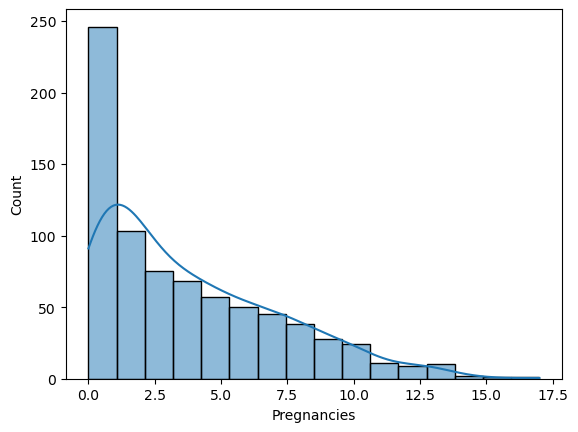

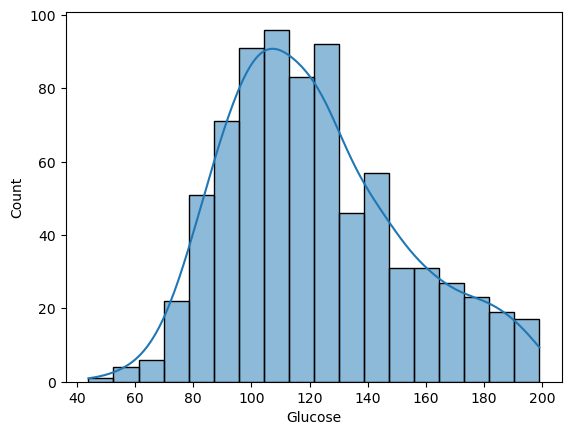

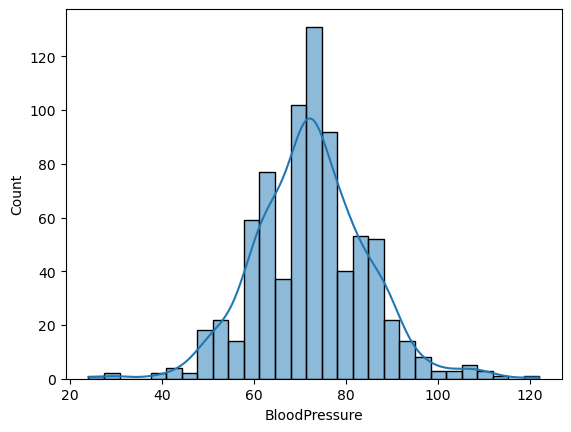

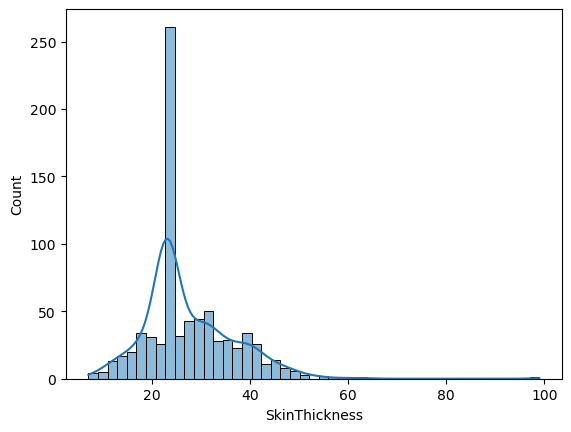

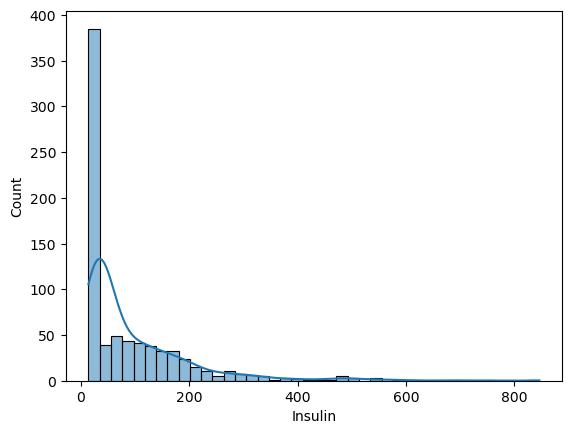

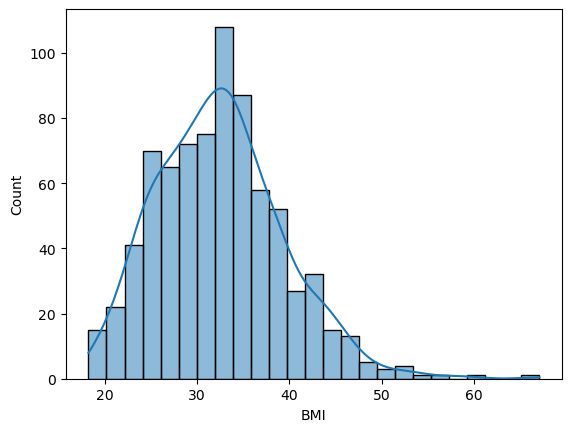

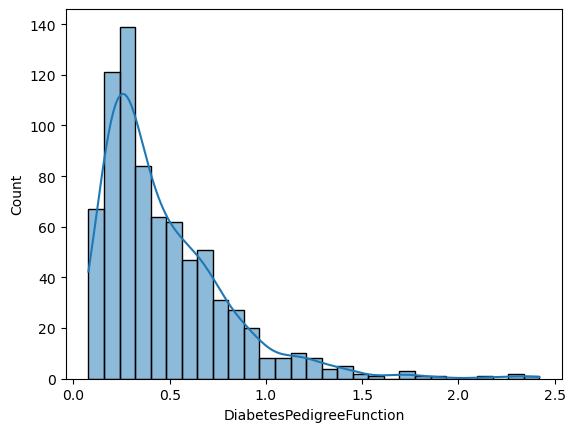

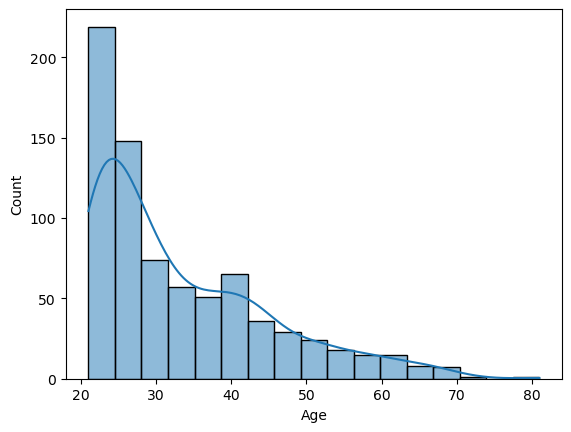

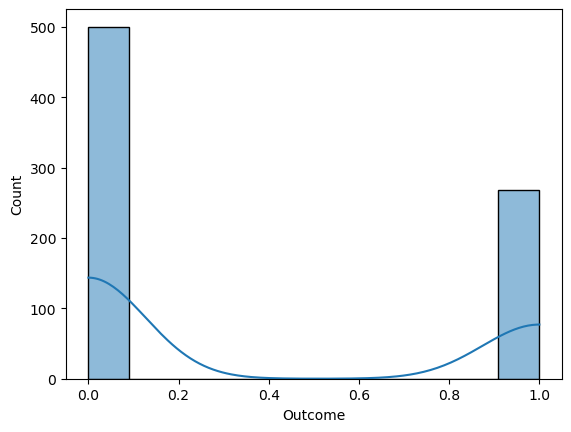

In [12]:
for i in data.columns:
    sns.histplot(data[i],kde=True)
    plt.show()

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<Axes: >

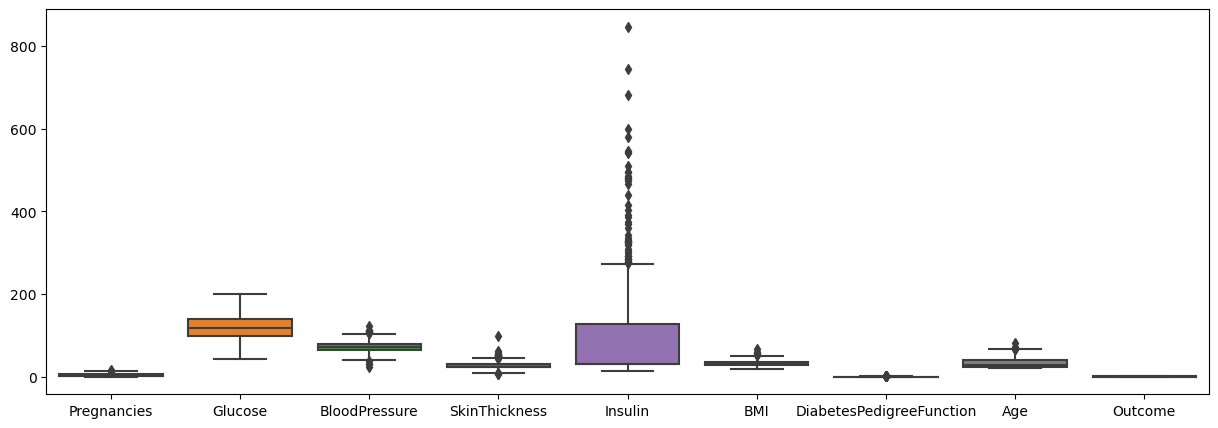

In [21]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data)

In [20]:
def outl(l):
    Q1,Q3=np.quantile(l,[0.25,0.75])
    IQR=Q3-Q1
    ul=Q3+IQR*1.5
    ll=Q1-IQR*1.5
    return ul,ll

In [22]:
for i in data.columns:
    upper,lower=outl(data[i])
    data[i]=np.where(data[i]>upper,upper,data[i])
    data[i]=np.where(data[i]<lower,lower,data[i])

<Axes: >

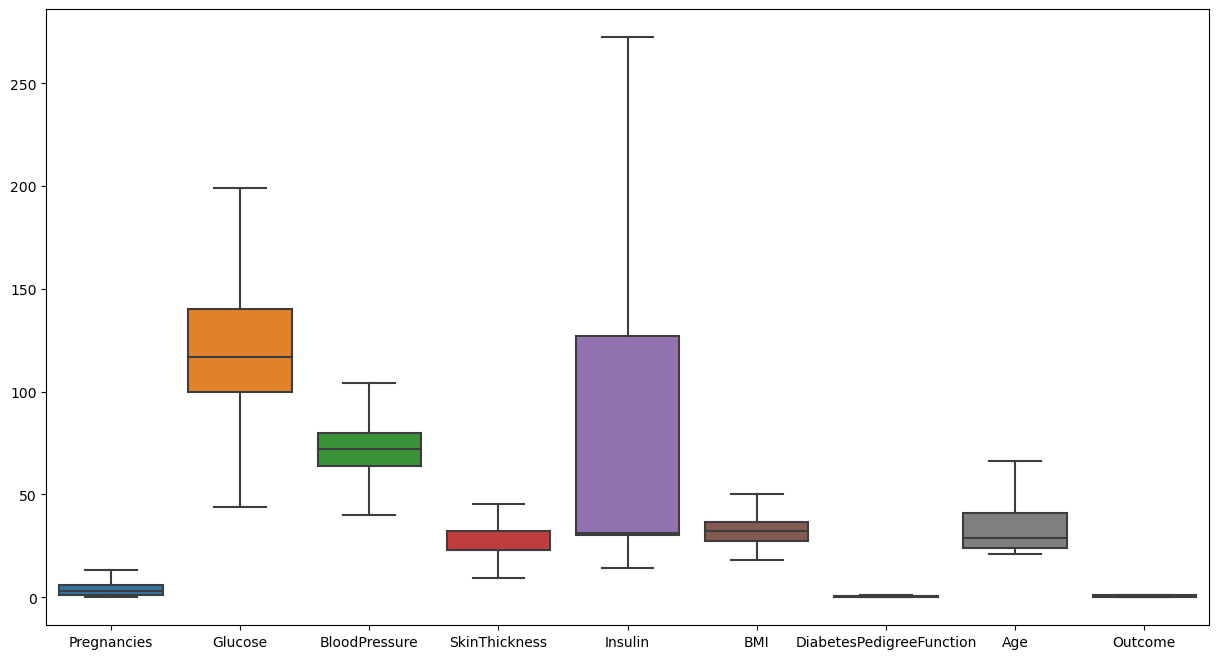

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data)

In [24]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_sclaed=scaler.transform(X_test)

In [36]:
def scaler_model(train,test):
    import pickle
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(train)
    X_test_sclaed=scaler.transform(test)
    pickle.dump(scaler,open('C:\\Users\\reetu\\Downloads\\Diabetesscaler.pkl','wb'))
    return X_train_scaled,X_test_sclaed

In [32]:
scaler_model(X_train,X_test)

In [34]:
lr_model=LogisticRegression()
lr_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [39]:
y_test_pred=lr_model.predict(X_test_sclaed)

In [40]:
accuracy_score(y_test,y_test_pred)

0.7792207792207793

In [42]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83       103
         1.0       0.65      0.71      0.68        51

    accuracy                           0.78       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



In [44]:
data.Outcome.value_counts()

Outcome
0.0    500
1.0    268
Name: count, dtype: int64

In [46]:
from sklearn.model_selection import GridSearchCV
params={'solver':['lbfgs', 'liblinear', 'newton-cg'],
        'penalty':['l1','l2'],
        'class_weight':['balanced',None]
}


In [48]:
clf=GridSearchCV(LogisticRegression(),param_grid=params,scoring='accuracy',cv=5)
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='accuracy')

In [52]:
y_pred_grid=clf.predict(X_test_sclaed)

In [53]:
accuracy_score(y_test,y_pred_grid)

0.7727272727272727

In [54]:
print(classification_report(y_pred_grid,y_test))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       102
         1.0       0.65      0.69      0.67        52

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.78      0.77      0.77       154



In [56]:
import pickle
file=open('C:\\Users\\reetu\\Downloads\\DiabetesLRGrid.pkl','wb')
pickle.dump(clf,file)
file.close()